<a href="https://colab.research.google.com/github/rajeevfromkrec/machine_Learning/blob/master/Churn_analysis_and_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/treselle-systems/customer_churn_analysis.git

Cloning into 'customer_churn_analysis'...
remote: Enumerating objects: 5, done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 5
Unpacking objects: 100% (5/5), done.


In [6]:
!ls 


customer_churn_analysis  sample_data  Telco-Customer-Churn.csv


In [4]:
!cp ./customer_churn_analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv  ./Telco-Customer-Churn.csv

In [5]:
!ls

customer_churn_analysis  sample_data  Telco-Customer-Churn.csv


In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [19]:
columns= df.columns

binary_columns= []

for column in columns:
  if(df[column].value_counts().shape[0]==2):
    binary_columns.append(column)

In [20]:
binary_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

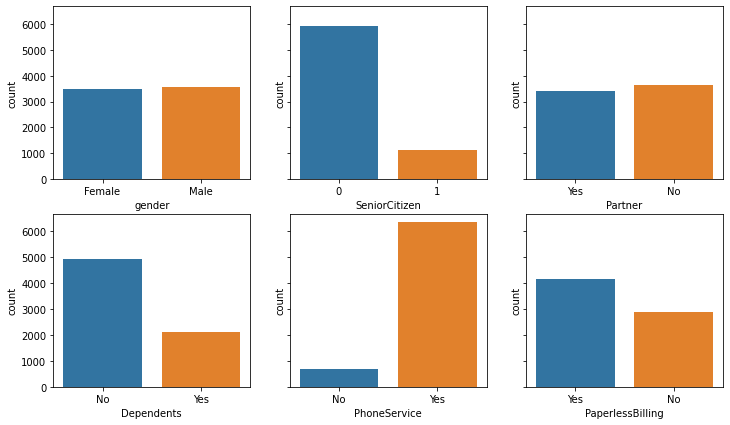

In [25]:
fig,axes=plt.subplots(2,3,figsize=(12,7),sharey=True)

sns.countplot('gender',data=df,ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])


In [28]:
churn_numeric= {'Yes':1,'No':0}
df.Churn.replace(churn_numeric,inplace=True)

In [30]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [37]:
df[['gender','Churn']].groupby(['gender']).sum()

,Churn
gender,
Female,939
Male,930


In [38]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).sum()

,Churn
SeniorCitizen,
0,1393
1,476


In [40]:
df[['Dependents','Churn']].groupby(['Dependents']).sum()

,Churn
Dependents,
No,1543
Yes,326


In [41]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).sum()

,Churn
PaperlessBilling,
No,469
Yes,1400


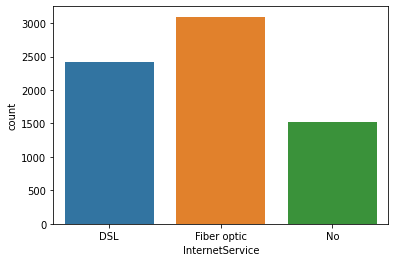

In [42]:
sns.countplot("InternetService", data=df)

In [44]:
df[['InternetService','Churn']].groupby(['InternetService']).sum()

,Churn
InternetService,
DSL,459
Fiber optic,1297
No,113


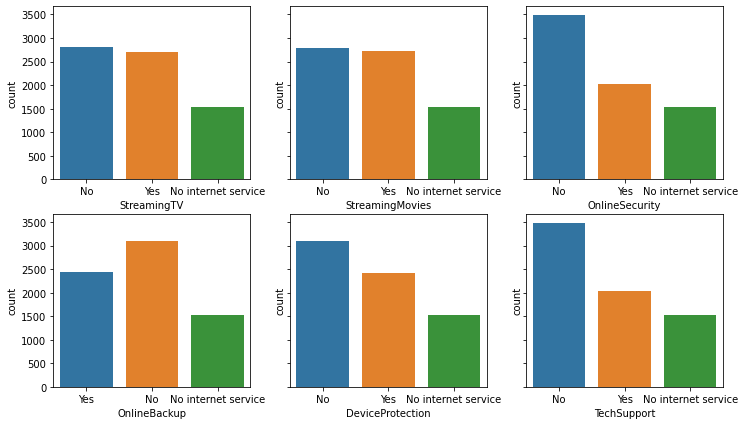

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])